In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import os
from dotenv import load_dotenv
import s3fs

# Import dataset

In [ ]:
# Chargement API KEYS
load_dotenv()

API_KEY_S3 = os.environ["API_KEY_S3"]
API_SECRET_KEY_S3 = os.environ["API_SECRET_KEY_S3"]

bucket_name = "renergies99-lead-bucket"
s3_prefix = "public"

In [ ]:
# Chargement du JSON
fs = s3fs.S3FileSystem(
    key=API_KEY_S3,
    secret=API_SECRET_KEY_S3,
)

json_path = "renergies99-lead-bucket/public/openweathermap/merge_openweathermap.json"
# ou "s3://renergies99-bucket/public/openweathermap/merge_openweathermap.json"

with fs.open(json_path, "r") as f:
    raw = json.load(f)

# Normalisation
frames = []

for city, content in raw.items():
    df = pd.DataFrame(content["data"])
    df["city"] = city
    df["lat"]  = float(content["lat"])
    df["lon"]  = float(content["lon"])
    
    # extraire le champ weather[0]["main"]
    df["weather_main"] = df["weather"].apply(lambda x: x[0]["main"])
    df["weather_desc"] = df["weather"].apply(lambda x: x[0]["description"])

    frames.append(df)


# DataFrame final
df_all = pd.concat(frames, ignore_index=True)

# Conversion dt en datetime
df_all["dt"] = pd.to_datetime(df_all["dt"], unit="s")
df_all["sunrise"] = pd.to_datetime(df_all["sunrise"], unit="s")
df_all["sunset"]  = pd.to_datetime(df_all["sunset"], unit="s")

df_all.head()

dt             sunrise              sunset   temp  \
0 2021-03-29 10:00:00 2021-03-29 05:31:48 2021-03-29 18:10:45  15.37   
1 2021-03-28 10:00:00 2021-03-28 05:33:46 2021-03-28 18:09:24  12.10   
2 2021-03-27 11:00:00 2021-03-27 05:35:45 2021-03-27 18:08:03  10.86   
3 2021-03-26 11:00:00 2021-03-26 05:37:44 2021-03-26 18:06:42  14.56   
4 2021-03-25 11:00:00 2021-03-25 05:39:42 2021-03-25 18:05:21  12.02   

   feels_like  pressure  humidity  dew_point  clouds  wind_speed  ...  rain  \
0       14.50      1032        59       7.41       0        1.31  ...   NaN   
1       10.83      1032        56       3.60       0        2.39  ...   NaN   
2        9.41      1031        54       1.93      55        2.56  ...   NaN   
3       13.69      1020        62       7.37      94        0.71  ...   NaN   
4       11.00      1025        66       5.87      68        2.69  ...   NaN   

  snow uvi visibility  wind_gust     city        lat      lon  weather_main  \
0  NaN NaN        NaN        NaN  Moulins  46.566053  3.33317         Clear   
1  NaN NaN        NaN        NaN  Moulins  46.566053  3.33317         Clear   
2  NaN NaN        NaN        NaN  Moulins  46.566053  3.33317        Clouds   
3  NaN NaN        NaN        NaN  Moulins  46.566053  3.33317        Clouds   
4  NaN NaN        NaN        NaN  Moulins  46.566053  3.33317        Clouds   

      weather_desc  
0        clear sky  
1        clear sky  
2    broken clouds  
3  overcast clouds  
4    broken clouds  

[5 rows x 22 columns]

In [16]:
df_all.shape

(8850, 22)

In [17]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8850 entries, 0 to 8849
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dt            8850 non-null   datetime64[ns]
 1   sunrise       8850 non-null   datetime64[ns]
 2   sunset        8850 non-null   datetime64[ns]
 3   temp          8850 non-null   float64       
 4   feels_like    8850 non-null   float64       
 5   pressure      8850 non-null   int64         
 6   humidity      8850 non-null   int64         
 7   dew_point     8850 non-null   float64       
 8   clouds        8850 non-null   int64         
 9   wind_speed    8850 non-null   float64       
 10  wind_deg      8850 non-null   int64         
 11  weather       8850 non-null   object        
 12  rain          1737 non-null   object        
 13  snow          40 non-null     object        
 14  uvi           30 non-null     float64       
 15  visibility    4343 non-null   float64 

In [18]:
df_all.describe(include="all")

dt                        sunrise  \
count                            8850                           8850   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2023-06-12 22:23:41.694915072  2023-06-12 17:33:01.910621440   
min               2021-01-09 11:00:00            2021-01-09 07:14:24   
25%               2022-03-27 10:00:00  2022-03-27 05:33:29.249999872   
50%               2023-06-12 22:00:00            2023-06-12 15:54:09   
75%               2024-08-28 10:00:00  2024-08-28 04:59:10.249999872   
max               2025-11-13 11:00:00            2025-11-13 06:45:58   
std                               NaN                            NaN   

                               sunset         temp   feels_like     pressure  \
count                            8850  8850.000000  8850.000000  8850.000000   
unique                            NaN          NaN          NaN          NaN   
top                               NaN          NaN          NaN          NaN   
freq                              NaN          NaN          NaN          NaN   
mean    2023-06-13 05:53:01.123954944    15.362667    14.603127  1018.104859   
min               2021-01-09 16:09:06    -3.280000    -8.890000   983.000000   
25%               2022-03-27 18:04:09     9.750000     8.790000  1014.000000   
50%               2023-06-13 07:31:57    15.000000    14.390000  1018.000000   
75%        2024-08-28 18:26:57.500000    21.010000    20.820000  1022.000000   
max               2025-11-13 16:24:08    36.770000    41.400000  1044.000000   
std                               NaN     7.663058     8.459923     7.516259   

           humidity    dew_point       clouds   wind_speed  ...          rain  \
count   8850.000000  8850.000000  8850.000000  8850.000000  ...          1737   
unique          NaN          NaN          NaN          NaN  ...           242   
top             NaN          NaN          NaN          NaN  ...  {'1h': 0.11}   
freq            NaN          NaN          NaN          NaN  ...            66   
mean      66.569266     8.669485    49.980678     2.746312  ...           NaN   
min       17.000000   -10.110000     0.000000     0.000000  ...           NaN   
25%       55.000000     4.280000     0.000000     1.540000  ...           NaN   
50%       66.000000     8.970000    55.000000     2.280000  ...           NaN   
75%       79.000000    13.350000    98.000000     3.600000  ...           NaN   
max      100.000000    24.670000   100.000000    13.380000  ...           NaN   
std       15.945140     6.021647    42.187595     1.818802  ...           NaN   

                snow        uvi    visibility   wind_gust     city  \
count             40  30.000000   4343.000000  333.000000     8850   
unique            32        NaN           NaN         NaN        5   
top     {'1h': 0.16}        NaN           NaN         NaN  Moulins   
freq               4        NaN           NaN         NaN     1770   
mean             NaN   1.524667   9736.241538    5.958048      NaN   
min              NaN   0.210000    250.000000    0.000000      NaN   
25%              NaN   1.495000  10000.000000    0.000000      NaN   
50%              NaN   1.625000  10000.000000    4.100000      NaN   
75%              NaN   1.745000  10000.000000   11.300000      NaN   
max              NaN   1.900000  10000.000000   23.150000      NaN   
std              NaN   0.374228   1154.434049    6.357315      NaN   

                lat          lon  weather_main  weather_desc  
count   8850.000000  8850.000000          8850          8850  
unique          NaN          NaN             8            21  
top             NaN          NaN        Clouds     clear sky  
freq            NaN          NaN          4031          2978  
mean      45.439034     4.286709           NaN           NaN  
min       44.3611

# EDA

In [19]:
# Nombre de  valeurs manquantes
valeurs_manquantes = df.isna().sum()
valeurs_manquantes

dt                 0
sunrise            0
sunset             0
temp               0
feels_like         0
pressure           0
humidity           0
dew_point          0
clouds             0
wind_speed         0
wind_deg           0
weather            0
rain            1563
uvi             1764
visibility      1764
wind_gust       1754
city               0
lat                0
lon                0
weather_main       0
weather_desc       0
dtype: int64

In [20]:
# Pourcentage de valeurs manquantes
valeurs_manquantes_pourcent = (df.isna().sum() / df.shape[0]) * 100
valeurs_manquantes_pourcent

dt               0.000000
sunrise          0.000000
sunset           0.000000
temp             0.000000
feels_like       0.000000
pressure         0.000000
humidity         0.000000
dew_point        0.000000
clouds           0.000000
wind_speed       0.000000
wind_deg         0.000000
weather          0.000000
rain            88.305085
uvi             99.661017
visibility      99.661017
wind_gust       99.096045
city             0.000000
lat              0.000000
lon              0.000000
weather_main     0.000000
weather_desc     0.000000
dtype: float64

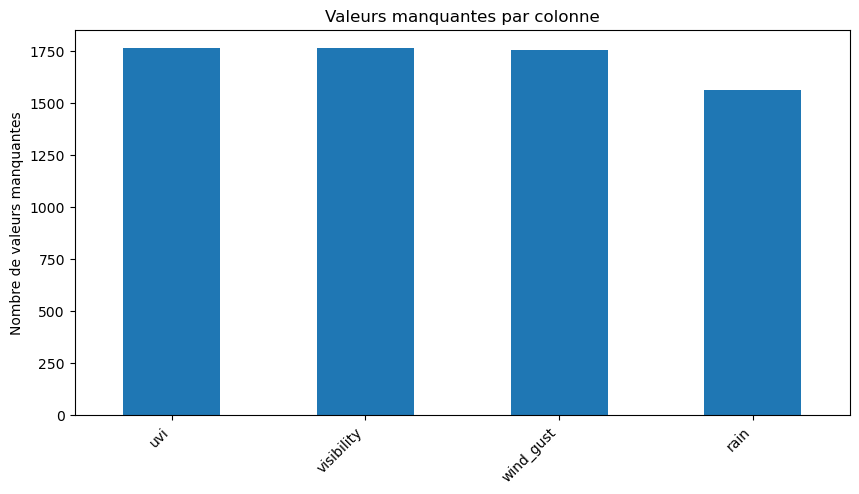

In [21]:
valeurs_manquantes_graph = valeurs_manquantes[valeurs_manquantes > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
# Prise en charge si valeurs manquetes à 0
if valeurs_manquantes_graph.empty:
    ax = plt.gca()
    ax.text(0.5, 0.5, "Aucune valeur manquante",
            ha="center", va="center", fontsize=12)
    ax.axis("off")
else:
    valeurs_manquantes_graph.plot(kind="bar")
    plt.title("Valeurs manquantes par colonne")
    plt.ylabel("Nombre de valeurs manquantes")
    plt.xticks(rotation=45, ha="right")

plt.show()

In [22]:
profile = ProfileReport(df_all, title="Analyse openwather", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 22/22 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Export dataframe

In [23]:
cols_to_remove = ["uvi", "visibility", "wind_gust", "weather"]
df_clean = df_all.drop(columns=cols_to_remove, errors="ignore")

In [ ]:
# Écriture directe du DataFrame cleaned sur S3
df_clean.to_csv(
    "s3://renergies99-lead-bucket/public/openweathermap/merge_openweathermap_cleaned.csv",
    index=False,
    storage_options={
        "key": API_KEY_S3,
        "secret": API_SECRET_KEY_S3,
    },
)

In [25]:
df_clean.shape

(8850, 18)